In [1]:
library("tidyverse")
library("ggrepel")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Assignment #4

## Due on October 22nd, 2020

Uncomment and run the following cell to set up the marathon data. 👇

In [2]:
df_marathon = read.csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

df_filtered = df_marathon %>% 
    filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan'))

df_country = df_marathon %>%
    filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan')) %>%
    group_by(country, MF) %>%
    summarize(race.time = mean(race.time), year = mean(year))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



This cell represents the progress we made on the marathon visualization in class. Add theme adjustments to create a chart with your own style. 

**This is a great resource for theme elements that you can adjust:** https://ggplot2.tidyverse.org/reference/theme.html

Here is a nice gallery of themes that you might base your work on: https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/

At minimum adjust the following chart attributes:
- `plot.background` and `panel.background`
- Use `labs` to improve the x and y-axis labels
- Add a title and subtitle with the `labs` or the `ggtitle` function ([hint](https://ggplot2.tidyverse.org/reference/labs.html))

If you want your title to line up with the left side of you "plot" instead of your "panel" use this inside your `theme` function:
```R
plot.title.position = "plot"
```

In [3]:
options(repr.plot.width = 5, repr.plot.height = 4.5, repr.plot.res = 300)

p = ggplot(df_marathon, aes(x = year, y = race.time))

p = p + geom_point(color = 'grey60')

p = p + geom_point(data = df_filtered, aes(color = country))

p = p + geom_text_repel(
    segment.color = 'transparent',
    nudge_y = 0.25,
    data = df_country, 
    aes(label = country, color = country)
)

p = p + facet_wrap(~MF, scales = "free", ncol = 1)

p = p + theme(legend.position = 'none')

p=p+scale_color_manual(values = c("United States"="lightgoldenrod2","Kenya"="orange","Ethiopia"="springgreen2", "Japan"="red"))


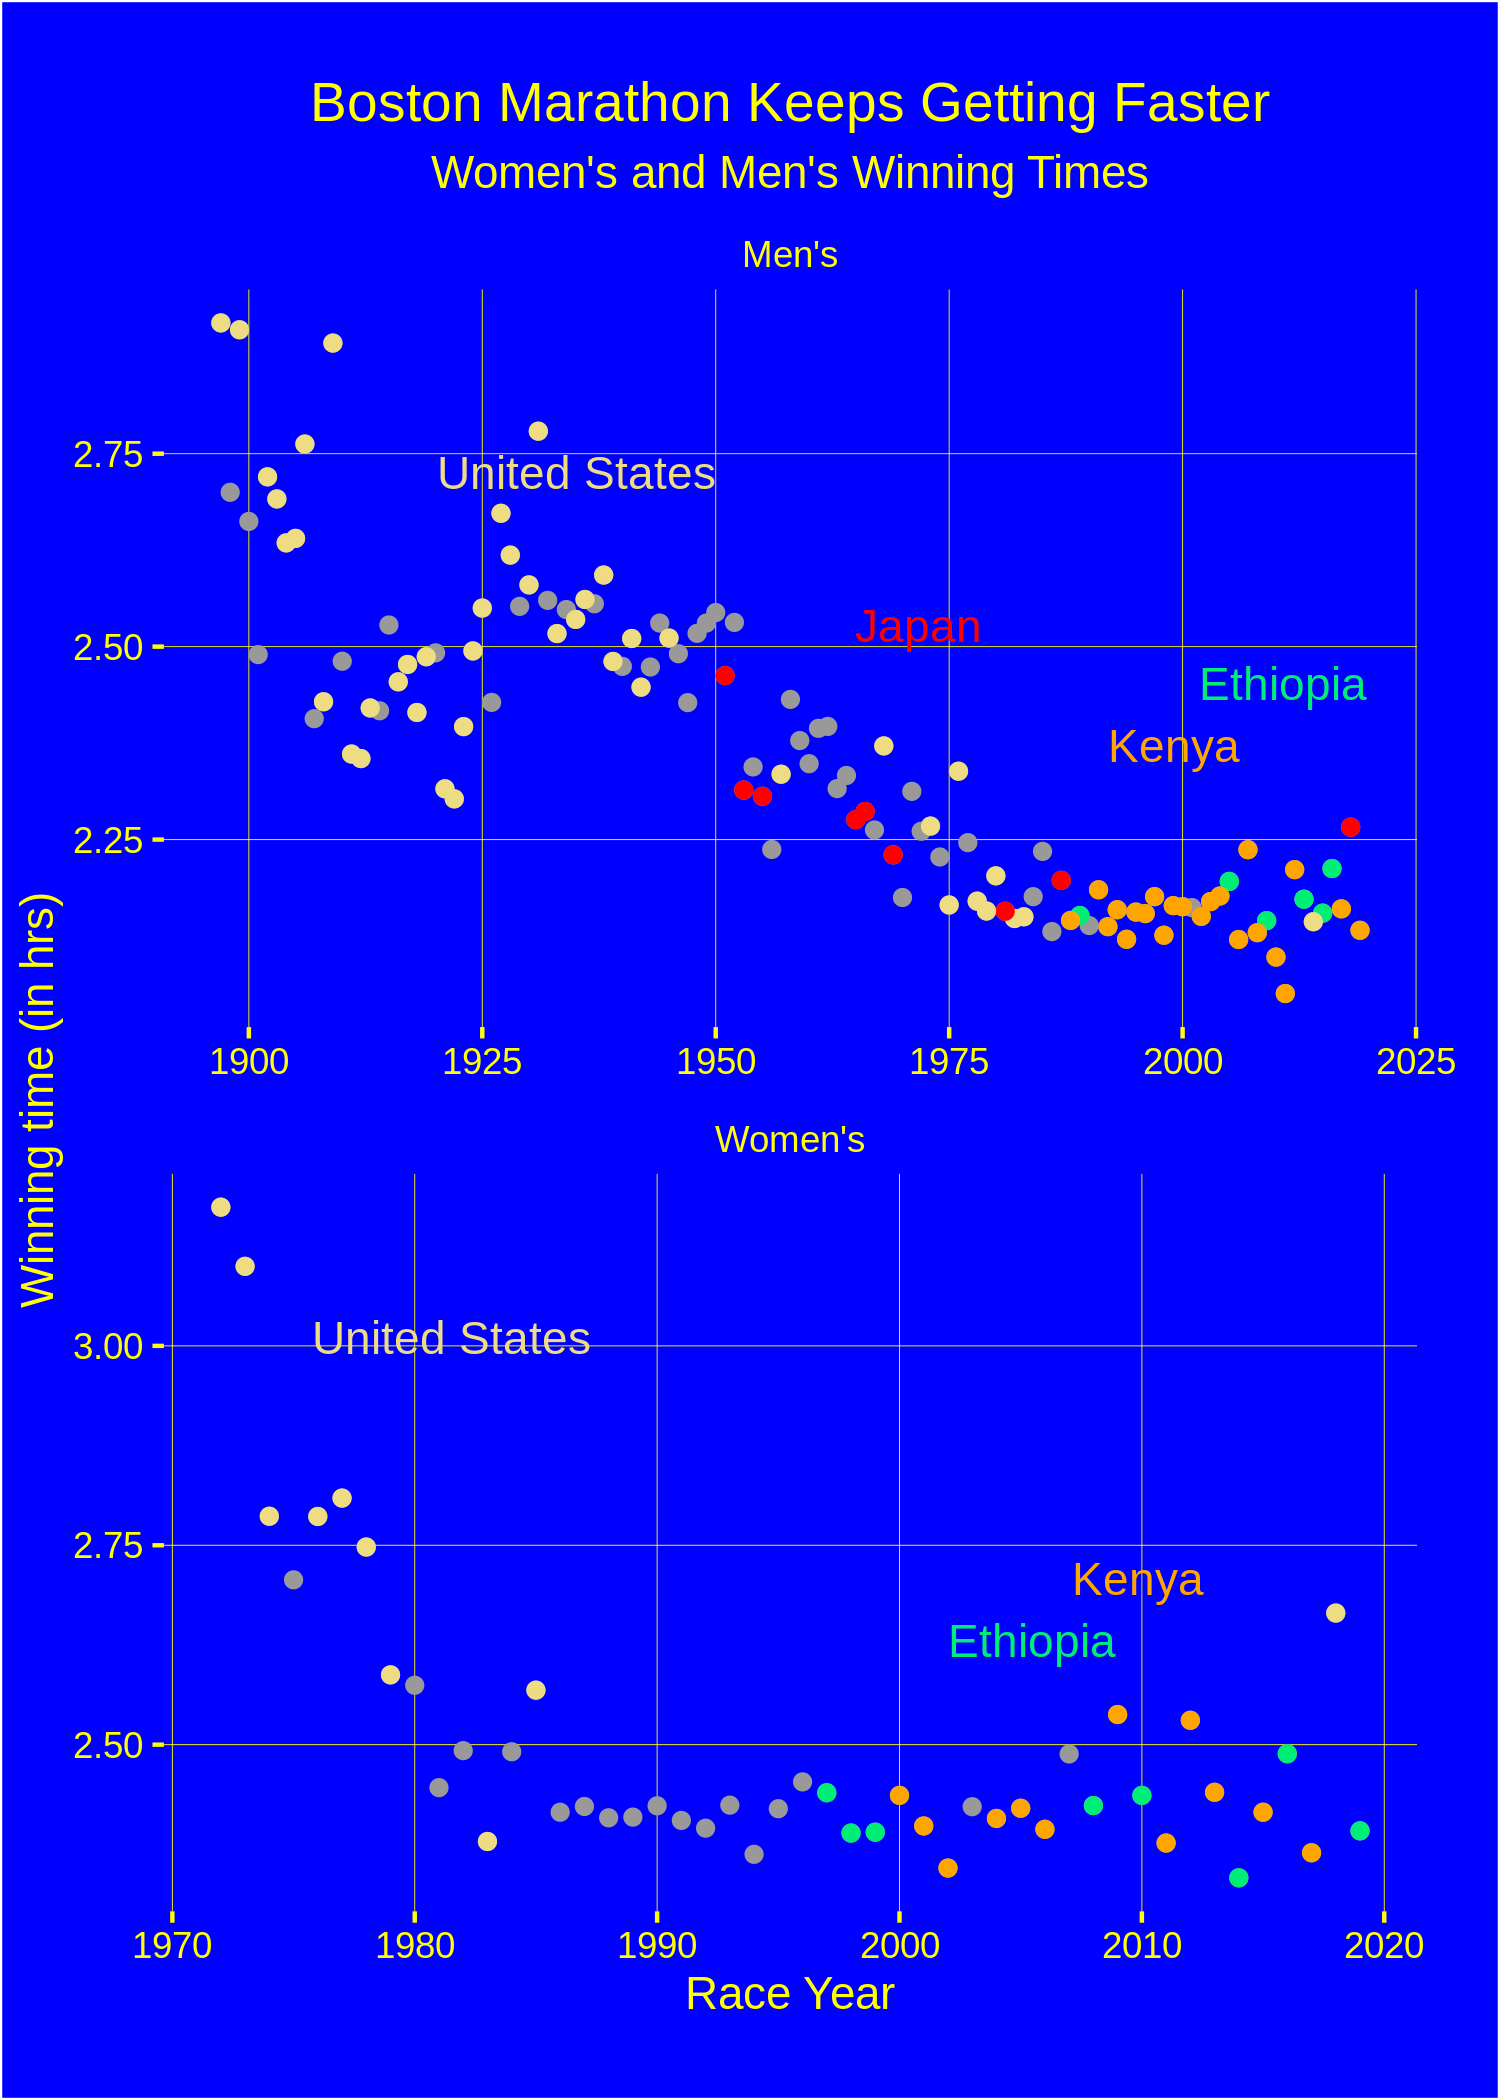

In [8]:
options(repr.plot.width = 5, repr.plot.height = 7, repr.plot.res = 300)
q=p+theme(plot.background=element_rect(fill = 'blue'),
          panel.background=element_rect(fill = 'blue'), 
          panel.grid.minor=element_blank(),
          panel.grid.major=element_line(size=.1,color="yellow"),
          plot.margin = margin(20, 20, 20,5),
          axis.text.x=element_text(color="yellow"),
          axis.text.y=element_text(colour="yellow"),
          axis.ticks.x=element_line((color="yellow")),
          axis.ticks.y=element_line((color="yellow")))
q=q+labs(title="Boston Marathon Keeps Getting Faster", 
         subtitle="Women's and Men's Winning Times",
         x="Race Year",
         y="Winning time (in hrs)"
         )
q=q+theme(title=element_text(color="yellow"),
          plot.title = element_text(hjust=0.5),
          plot.subtitle = element_text(hjust=0.5),
          strip.background =element_rect(fill="blue"),
          strip.text = element_text(colour = 'yellow'))   
q

The official colors of the Boston Marathon are Blue and Yellow so I decided to include them in the graph. In order to make the points more visible I changed the colors as well.

Here is my solution...

<img src="./04_example.png" style="width: 800px;" />